# Testing DFT, DCT2, gen_matrix

In [1]:
import numpy as np
from scipy.fft import fft, ifft
from scipy.fftpack import dct

# x = np.array([1,2,3,4]) # N -> even
# x = np.array([1,2,3,4,5]) # N -> odd
# x = np.array([1,2,3,4,5,6,7,8])
# x = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
# x = np.array([1,2,3,4,4,3,2,1])

# q = 10
# n = 8
# x = np.random.randint(0, q, n)

x = np.array([1,6,2,4,0,6,7,2])

## DFT

$$
    X[k] = \sum_{n=0}^{N-1} x[n] e^{-j \frac{2\pi}{N} kn}, \quad k = 0,1,\dots, N-1
$$

#### DFT, IDFT - Scipy (For testing)

In [2]:
scipy_dft = fft(x)
scipy_idft = ifft(scipy_dft)

numpy_dft = np.fft.fft(x)
numpy_idft = np.fft.ifft(numpy_dft)

print("Original Signal:       ", x)
print("\n")

print("Scipy DFT:             ", np.round(scipy_dft,4))
print("Scipy IDFT:            ", np.round(scipy_idft,4))
print("\n")

print("Numpy DFT:             ", np.round(numpy_dft,4))
print("Numpy IDFT:            ", np.round(numpy_idft,4))

Original Signal:        [1 6 2 4 0 6 7 2]


Scipy DFT:              [28.    -0.j     -0.4142+3.5858j -8.    -6.j      2.4142-6.4142j
 -8.    -0.j      2.4142+6.4142j -8.    +6.j     -0.4142-3.5858j]
Scipy IDFT:             [1.+0.j 6.+0.j 2.+0.j 4.+0.j 0.+0.j 6.+0.j 7.-0.j 2.+0.j]


Numpy DFT:              [28.    +0.j     -0.4142+3.5858j -8.    -6.j      2.4142-6.4142j
 -8.    +0.j      2.4142+6.4142j -8.    +6.j     -0.4142-3.5858j]
Numpy IDFT:             [1.+0.j 6.+0.j 2.+0.j 4.+0.j 0.+0.j 6.+0.j 7.+0.j 2.+0.j]


#### DFT - Brute Force

In [3]:
def brute_force_dft(x, N):
    X = np.zeros(N, dtype=complex)

    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)

    return np.round(X, 4)

X_dft = brute_force_dft(x=x, N=len(x))
print(x)
print(X_dft)

[1 6 2 4 0 6 7 2]
[28.    +0.j     -0.4142+3.5858j -8.    -6.j      2.4142-6.4142j
 -8.    -0.j      2.4142+6.4142j -8.    +6.j     -0.4142-3.5858j]


In [4]:
for k, value in enumerate(X_dft):
    print(f"X[{k}] = {value}")

X[0] = (28+0j)
X[1] = (-0.4142+3.5858j)
X[2] = (-8-6j)
X[3] = (2.4142-6.4142j)
X[4] = (-8-0j)
X[5] = (2.4142+6.4142j)
X[6] = (-8+6j)
X[7] = (-0.4142-3.5858j)


#### IDFT - Brute Force

In [5]:
def idft(X, N):
    x = np.zeros(N, dtype=complex)

    for n in range(N):
        for k in range(N):
            x[n] += X[k] * np.exp(2j * np.pi * k * n / N)

    return np.round(x / N, 4)

x_idft = idft(X=X_dft, N=len(X_dft))
print(x_idft)
print(np.sqrt(np.real(x_idft)**2 + np.imag(x_idft)**2))

[1.+0.j 6.-0.j 2.+0.j 4.-0.j 0.+0.j 6.-0.j 7.-0.j 2.-0.j]
[1. 6. 2. 4. 0. 6. 7. 2.]


#### Recursive DFT

In [6]:
def dft(u, n):
    n1 = n // 2
    if n == 2:
        return np.array([u[0] + u[1], u[0] - u[1]])

    zeta = np.exp(-2j * np.pi / n)
    Dn = np.diag([zeta**k for k in range(n1)])
    Hn = np.block([[np.eye(n1), np.eye(n1)],
                   [Dn, -Dn]])

    p = np.dot(Hn, u)
    # p = Hn @ u

    s1 = dft(p[:n1], n1)
    s2 = dft(p[n1:], n1)

    interleaved = np.empty((len(s1) + len(s2)), dtype=complex)  # data type - complex
    interleaved[0::2] = s1  # even indices with s1
    interleaved[1::2] = s2  # odd indices with s2

    y = interleaved

    return y

X_dft = dft(x, len(x))
print(x)
print(X_dft)

[1 6 2 4 0 6 7 2]
[28.        +0.j         -0.41421356+3.58578644j -8.        -6.j
  2.41421356-6.41421356j -8.        +0.j          2.41421356+6.41421356j
 -8.        +6.j         -0.41421356-3.58578644j]


#### Recursive IDFT

In [7]:
def idft(y, n):
    n1 = n// 2

    if n == 2:
        return np.array([y[0] + y[1], y[0] - y[1]]) / 2

    elif n >= 4:
        q = np.concatenate((y[0:n:2], y[1:n:2]))

        b1 = idft(q[:n1], n1)
        b2 = idft(q[n1:], n1)

        b_out = np.concatenate((b1, b2))

        zeta = np.exp(-2j * np.pi / n)
        Dn = np.diag([zeta**k for k in range(n1)])
        Hn = np.block([[np.eye(n1), np.eye(n1)],
                       [Dn, -Dn]])

        Hn_conj = np.conjugate(Hn).T

        z1 = np.dot(Hn_conj, b_out)

        out = z1 / 2 # scale down since IDFT requires normalization

        return out

X_idft = idft(x, len(x))
print(x)
print(X_idft)
print(np.sqrt(np.real(X_idft)**2 + np.imag(X_idft)**2))

[1 6 2 4 0 6 7 2]
[ 3.5      +0.j        -0.0517767-0.4482233j -1.       +0.75j
  0.3017767+0.8017767j -1.       +0.j         0.3017767-0.8017767j
 -1.       -0.75j      -0.0517767+0.4482233j]
[3.5        0.4512039  1.25       0.85668842 1.         0.85668842
 1.25       0.4512039 ]


# DCT

\begin{equation}
    c[k] = \alpha[k] \sum_{n=0}^{N-1} x[n] \cdot \cos\left( \frac{\pi (2n+1) k}{2N} \right), \quad 0 \leq k \leq N-1
\end{equation}

where $\alpha[0] = \sqrt{\frac{1}{N}}$, and $\alpha[k] = \sqrt{\frac{2}{N}}$ for $ k \in \{ 1, 2, \dots , N-1\}$

#### Sci-py Library (test for comparison)

In [8]:
scipy_dct2 = dct(x, type=2, norm='ortho')
scipy_dct3 = dct(scipy_dct2, type=3, norm='ortho')

print("Original Signal:       ", x)
print("\n")

print("Scipy DCT-II:          ", np.round(scipy_dct2,4))
print("Scipy DCT-III:         ", np.round(scipy_dct3,4))

Original Signal:        [1 6 2 4 0 6 7 2]


Scipy DCT-II:           [ 9.8995 -1.6271  0.4948  0.5322 -4.9497  1.4854 -2.501  -3.4443]
Scipy DCT-III:          [1. 6. 2. 4. 0. 6. 7. 2.]


#### Brute Force

In [9]:
def dct_ii(x):
    N = len(x)
    v = np.zeros(N)

    for k in range(N):
        alpha_k = np.sqrt(1/N) if k == 0 else np.sqrt(2/N)
        summation = sum(x[n] * np.cos(np.pi * (2 * n + 1) * k / (2 * N)) for n in range(N))
        v[k] = alpha_k * summation

    return np.round(v,4)

X_dct2 = dct_ii(x)
print(x)
print(X_dct2)

[1 6 2 4 0 6 7 2]
[ 9.8995 -1.6271  0.4948  0.5322 -4.9497  1.4854 -2.501  -3.4443]


#### Recursive radix-2 DCT-II

In [10]:
def cos2(x, n):
    if n == 2:
        H_2 = (1 / np.sqrt(2)) * np.array([[1, 1], [1, -1]])
        return H_2 @ x
    else:
        # recursive case: n >= 4
        n1 = n // 2

        # Orthogonal matrix (Hadamard-like)
        I_half = np.eye(n1)
        I_tilde_half = np.flip(I_half, axis=1)
        H = np.block([
            [I_half, I_tilde_half],
            [I_half, -I_tilde_half]
        ])
        H_n = (1 / np.sqrt(2)) * H
        u = H_n @ x

        # Diagonal weight matrix [W_c] - matrix 3
        W_entries = [1] * n1 + [ (1 / np.cos((2*k - 1)*np.pi / (2*n))) / 2 for k in range(1, n1+1) ]
        W_c = np.diag(W_entries)
        v = W_c @ u

        # Recursive DCT-II on halves - matrix 2
        z1 = cos2(v[:n1], n1)
        z2 = cos2(v[n1:], n1)

        # Bidiagonal matrix
        B = np.eye(n1)
        np.fill_diagonal(B[:-1, 1:], 1)
        B[0, 0] = np.sqrt(2)
        B_c = np.block([
            [np.eye(n1), np.zeros((n1, n1))],
            [np.zeros((n1, n1)), B]
        ])
        w = B_c @ np.concatenate([z1, z2])

        y_my = np.concatenate([w[::2], w[1::2]])
        # print("\ny_my: ", y_my)
        # Permutation (bit-reversal-like)
        perm = np.arange(n).reshape(2, -1).T.flatten()
        # print("\nperm: ", perm)
        y = w[perm]
        # print("\ny_perm: ", y)

        return y

X_dct2 = cos2(x, len(x))
print(x)
print(X_dct2)

[1 6 2 4 0 6 7 2]
[ 9.89949494 -1.62708727  0.49476881  0.53224045 -4.94974747  1.4853661
 -2.50104055 -3.44426983]


#### Recursive radix-2 DCT-III

In [11]:
def cos3(x, n):
    if n == 2:
        # base case: n = 2
        H_2 = (1 / np.sqrt(2)) * np.array([[1, 1], [1, -1]])
        y = H_2 @ x
        return y

    else:
        # recursive case: n >= 4
        n1 = n // 2

        # Step 1: Permutation P_n
        P_n = np.concatenate([x[::2], x[1::2]])

        # Step 2: Apply B_c^T
        B = np.eye(n1)
        np.fill_diagonal(B[:-1, 1:], 1)
        B[0, 0] = np.sqrt(2)

        B_c_T = np.block([
            [np.eye(n1), np.zeros((n1, n1))],
            [np.zeros((n1, n1)), B.T]
        ])
        u = B_c_T @ P_n

        # Step 3: Recursive calls for z1 and z2
        z1 = cos3(u[:n1], n1)
        z2 = cos3(u[n1:], n1)

        # Step 4: Combine results using W_c
        W_c = np.diag([1] * n1 + [1 / np.cos((2 * k - 1) * np.pi / (2 * n)) / 2 for k in range(1, n1 + 1)])
        w = W_c @ np.concatenate([z1, z2])

        # Step 5: Apply H_n^T
        I_half = np.eye(n1)
        I_tilde_half = np.flip(I_half, axis=1)
        H = np.block([
            [I_half, I_tilde_half],
            [I_half, -I_tilde_half]
        ])
        H_n_T = (1 / np.sqrt(2)) * H.T
        y = H_n_T @ w

        return y

X_dct3 = cos3(x, len(x))
print(x)
print(X_dct3)

[1 6 2 4 0 6 7 2]
[ 9.08392102 -3.89103942  4.32632904 -0.9219641  -2.89747221  2.08256761
 -1.10364366 -3.85027115]


# Relationship between DFT and DCT

References:
- Ahmed, Nasir, T_ Natarajan, and Kamisetty R. Rao. "Discrete cosine transform." IEEE transactions on Computers 100.1 (2006): 90-93.
- Strang, Gilbert. "The discrete cosine transform." SIAM review 41.1 (1999): 135-147.

\begin{equation}
    c[k] = \operatorname{Re} \left\{ \alpha[k] \cdot e^{-j \frac{\pi k}{2N}} \cdot (F\hat{x})[k] \right\}
\end{equation}

where $\hat{x}[n]$ represents an even and symmetric extension of the input sequence, defined as:

\begin{equation}
    \hat{x}[n] = x[2n], \quad \hat{x}[N - n - 1] = x[2n + 1], \quad 0 \leq n \leq \frac{N}{2} - 1
\end{equation}

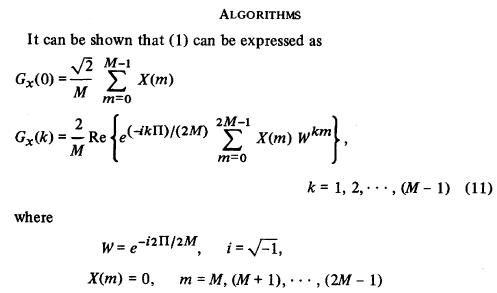

In [12]:
def dct_new(x):
    N = len(x)
    if N % 2 != 0:
        raise ValueError("Sequence length must be even.")

    x_hat = np.zeros(N, dtype=np.complex128)
    half_N = N // 2

    # permutation
    for n in range(half_N):
        x_hat[n] = x[2 * n]          # even-indexed elements
        x_hat[N - n - 1] = x[2 * n + 1]  # odd-indexed elements (reversed)

    print("\n x_hat before FFT: ", np.real(x_hat))

    # compute DFT
    X_hat_dft = dft(x_hat, len(x_hat))

    print("\n X_hat after FFT: ", X_hat_dft)

    # shift and scaling
    k = np.arange(N)
    shift = np.exp(-1j * np.pi * k / (2 * N))

    alpha_k = np.where(k == 0, np.sqrt(1/N), np.sqrt(2/N))

    X_dct = np.real(alpha_k * shift * X_hat_dft)

    return X_dct

print(x)
print("\n DFT on original vector: ", dft(x, len(x)))
print(np.round(dct_new(x),4))
print("\n")

dct_coeff_from_dft = np.round(dct_new(x),4)
print("DCT coefficients obtained from DFT: ", dct_coeff_from_dft)

dct_coeff = cos2(x, len(x))
print("DCT coefficients obtained from recursive radix-2 algo: ", dct_coeff)

# coefficients are same

# original signal can be reconstructed by applying DCT-III on dct_coeff_from_dft
original_signal = cos3(dct_coeff_from_dft, len(dct_coeff_from_dft))
print(np.round(original_signal))

[1 6 2 4 0 6 7 2]

 DFT on original vector:  [28.        +0.j         -0.41421356+3.58578644j -8.        -6.j
  2.41421356-6.41421356j -8.        +0.j          2.41421356+6.41421356j
 -8.        +6.j         -0.41421356-3.58578644j]

 x_hat before FFT:  [1. 2. 0. 7. 2. 6. 4. 6.]

 X_hat after FFT:  [ 28.        +0.j          -4.53553391+6.12132034j
  -1.        +5.j           2.53553391-1.87867966j
 -14.        +0.j           2.53553391+1.87867966j
  -1.        -5.j          -4.53553391-6.12132034j]
[ 9.8995 -1.6271  0.4948  0.5322 -4.9497  1.4854 -2.501  -3.4443]



 x_hat before FFT:  [1. 2. 0. 7. 2. 6. 4. 6.]

 X_hat after FFT:  [ 28.        +0.j          -4.53553391+6.12132034j
  -1.        +5.j           2.53553391-1.87867966j
 -14.        +0.j           2.53553391+1.87867966j
  -1.        -5.j          -4.53553391-6.12132034j]
DCT coefficients obtained from DFT:  [ 9.8995 -1.6271  0.4948  0.5322 -4.9497  1.4854 -2.501  -3.4443]
DCT coefficients obtained from recursive radix-2 alg

In [13]:
N = len(x)

print("\nwe don't know what x is (sender has encoded this already):", x)

X_dft = dft(x, len(x))
print("\nwhat we were given (encoded vector): ", X_dft)

k = np.arange(N)
shift = np.exp(-1j * np.pi * k / (2 * N))
alpha_k = np.where(k == 0, np.sqrt(1/N), np.sqrt(2/N))
X_dct = np.real(alpha_k * shift * X_dft)

print("\nDCT coefficients constructed using given fft: ", np.round(X_dct,4))

X = cos3(X_dct, len(X_dct))
print("\nreconstructed signal (through DCT-III): ", np.round(X,4))
print("DCT-III is replaced by the DCT-III imposed neural network")

perm = np.concatenate((X[::2], X[1::2][::-1])) # even indexes + odd indexes - reversed order
print("\nWhat we obtain from our end (this matches with the sender's data): ", np.round(perm,4))


we don't know what x is (sender has encoded this already): [1 6 2 4 0 6 7 2]

what we were given (encoded vector):  [28.        +0.j         -0.41421356+3.58578644j -8.        -6.j
  2.41421356-6.41421356j -8.        +0.j          2.41421356+6.41421356j
 -8.        +6.j         -0.41421356-3.58578644j]

DCT coefficients constructed using given fft:  [ 9.8995  0.1466 -4.8436 -0.7781 -2.8284  3.3372  1.2409 -1.7988]

reconstructed signal (through DCT-III):  [ 1.  2.  6.  7.  2.  6.  4. -0.]
DCT-III is replaced by the DCT-III imposed neural network

What we obtain from our end (this matches with the sender's data):  [ 1.  6.  2.  4. -0.  6.  7.  2.]


# If the codewords were encoded using the Gen Matrix

$$
\text{Generator matrix: } \quad \tilde{M}_{kj} = \left[ \left( \frac{w_0}{z_0} \right)^j \zeta^{kj} \right]_{k,j=0}^{n-1} \\
\text{DFT matrix: } \quad F_{kj} = \left[ \zeta^{kj} \right]_{k,j=0}^{n-1} \\
\text{where:} \quad \zeta = e^{- \frac{2\pi i}{n}}
$$

In [14]:
q = 10
n = 8
x = np.random.randint(0, q, n)

def padded_generator_matrix(N, w0, z0):
    n = np.arange(N)
    k = n.reshape((N, 1))
    zeta = np.exp(-2j * np.pi / N)
    M_tilde = ((w0 / z0) ** n) * (zeta ** (k * n))
    return M_tilde

w0 = 4
z0 = 3
M_tilde = padded_generator_matrix(n, w0, z0)
gen_matrix_encoded = np.dot(M_tilde, x)

print("Original Signal:       ", x)

print("\nGen-Matrix Encoded:    ", np.round(gen_matrix_encoded,4))

decoded = idft(gen_matrix_encoded, len(gen_matrix_encoded))
print("\nData decoded using IDFT (before resclaing): ", np.round(decoded, 4))

decoded = np.sqrt(np.real(decoded)**2 + np.imag(decoded)**2)
print(np.round(decoded, 4))

D_hat_n = np.array([(z0 / w0) ** k for k in range(n)])
decoded = D_hat_n * decoded

print("Decoded data after rescaling: ", np.round(decoded, 4))

Original Signal:        [5 0 0 9 4 1 5 1]

Gen-Matrix Encoded:     [ 78.7741 +0.j     -20.4093+21.2854j -10.4513+24.6109j   5.1254-34.9012j
  12.6964 +0.j       5.1254+34.9012j -10.4513-24.6109j -20.4093-21.2854j]

Data decoded using IDFT (before resclaing):  [ 5.    -0.j -0.    -0.j -0.    +0.j 21.3333+0.j 12.642 +0.j  4.214 +0.j
 28.0933+0.j  7.4915-0.j]
[ 5.      0.      0.     21.3333 12.642   4.214  28.0933  7.4915]
Decoded data after rescaling:  [5. 0. 0. 9. 4. 1. 5. 1.]


In [15]:
for k, value in enumerate(gen_matrix_encoded):
    print(f"X[{k}] = {np.round(value, 4)}")

X[0] = (78.7741+0j)
X[1] = (-20.4093+21.2854j)
X[2] = (-10.4513+24.6109j)
X[3] = (5.1254-34.9012j)
X[4] = (12.6964+0j)
X[5] = (5.1254+34.9012j)
X[6] = (-10.4513-24.6109j)
X[7] = (-20.4093-21.2854j)


In [16]:
D_hat_n = np.diag([(z0 / w0) ** k for k in range(n)])
D_hat_n

array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.75      , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.5625    , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.421875  , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.31640625,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.23730469, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.17797852, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13348389]])

In [17]:
#  this test is to see if we can use the diagonal scaling as a custom weight matrix initializer in our neural network

import tensorflow as tf

output_dim = 4

def custom_initializer(shape, dtype=None):
    n = shape[0]
    values = np.array([(z0 / w0) ** k for k in range(n)], dtype=np.float32)
    return tf.convert_to_tensor(values, dtype=dtype)

weights = custom_initializer((output_dim,))
print("Initialized weights:", weights.numpy())


Initialized weights: [1.       0.75     0.5625   0.421875]


#### Testing the DCT2 and DFT relationship with gen matrix

In [18]:
#  we assume that we are given a data sample encoded using a DFT-like matrix (the generator matrix)
#  we already have the gen_matrix_encoded data

y = gen_matrix_encoded

print("we don't know what x is (what we want to reconstruct):", x)

print("\nwhat we were given (encoded vector): ", y)

k = np.arange(N)
shift = np.exp(-1j * np.pi * k / (2 * N))
alpha_k = np.where(k == 0, np.sqrt(1/N), np.sqrt(2/N))
X_dct = np.real(alpha_k * shift * y)

print("\nDCT coefficients constructed using given fft: ", np.round(X_dct,4))

X = cos3(X_dct, len(X_dct))
print("\nreconstructed signal (through DCT-III): ", np.round(X, 4))
print("DCT-III is replaced by the DCT-III imposed neural network")

perm = np.concatenate((X[::2], X[1::2][::-1])) # even indexes + odd indexes - reversed order
print("\nAfter permutation: ", np.round(perm))

# D_hat_n = np.array([(z0 / w0) ** k for k in range(len(x))]) # scaling back -> do after permutation
D_hat_n = tf.pow(tf.constant(z0, dtype=tf.float32) / tf.constant(w0, dtype=tf.float32),
                         tf.cast(tf.range(len(x)), dtype=tf.float32))
decoded = D_hat_n * perm
print("After Scaling: ", np.round(decoded, 4))
print("\nOur results match with the sender's original results")

we don't know what x is (what we want to reconstruct): [5 0 0 9 4 1 5 1]

what we were given (encoded vector):  [ 78.7741198  +0.j         -20.40934274+21.28539534j
 -10.45130316+24.61088249j   5.12539212-34.90116158j
  12.69638775 +0.j           5.12539212+34.90116158j
 -10.45130316-24.61088249j -20.40934274-21.28539534j]

DCT coefficients constructed using given fft:  [ 27.8509  -7.9323  -0.1188  -7.5642   4.4889  15.9334 -13.3685 -12.429 ]

reconstructed signal (through DCT-III):  [ 5.      7.4915 -0.     28.0933 -0.      4.214  21.3333 12.642 ]
DCT-III is replaced by the DCT-III imposed neural network

After permutation:  [ 5. -0. -0. 21. 13.  4. 28.  7.]
After Scaling:  [ 5. -0. -0.  9.  4.  1.  5.  1.]

Our results match with the sender's original results
